## Introduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import Data

In [2]:
dataset=pd.read_csv('C:/Users/H_jam/OneDrive/Uni-MA/Term2/DataMining/DataSets/Classification/Decision Tree Classification/Social_Network_Ads.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Define x , y

In [3]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

Spit to train , test

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Fititng Decission Tree  to Trainnig Set

with Max Depth 3

In [6]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

without define Max Depth

In [5]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting the Test set result

In [6]:
y_pred=classifier.predict(X_test)

## Making the Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[62,  6],
       [ 3, 29]], dtype=int64)

In [13]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred)
cm2

array([[62,  6],
       [ 3, 29]], dtype=int64)

## Plot Tree With 2 Method

### Method 1

[Text(0.4642857142857143, 0.9, 'Age <= 44.5\nentropy = 0.951\nsamples = 300\nvalue = [189, 111]\nclass = N'),
 Text(0.23809523809523808, 0.7, 'EstimatedSalary <= 90500.0\nentropy = 0.693\nsamples = 215\nvalue = [175, 40]\nclass = N'),
 Text(0.09523809523809523, 0.5, 'Age <= 36.5\nentropy = 0.241\nsamples = 176\nvalue = [169, 7]\nclass = N'),
 Text(0.047619047619047616, 0.3, 'entropy = 0.0\nsamples = 114\nvalue = [114, 0]\nclass = N'),
 Text(0.14285714285714285, 0.3, 'EstimatedSalary <= 67500.0\nentropy = 0.509\nsamples = 62\nvalue = [55, 7]\nclass = N'),
 Text(0.09523809523809523, 0.1, '\n  (...)  \n'),
 Text(0.19047619047619047, 0.1, '\n  (...)  \n'),
 Text(0.38095238095238093, 0.5, 'EstimatedSalary <= 133500.0\nentropy = 0.619\nsamples = 39\nvalue = [6, 33]\nclass = Y'),
 Text(0.3333333333333333, 0.3, 'EstimatedSalary <= 107500.0\nentropy = 0.779\nsamples = 26\nvalue = [6, 20]\nclass = Y'),
 Text(0.2857142857142857, 0.1, '\n  (...)  \n'),
 Text(0.38095238095238093, 0.1, '\n  (...)  \

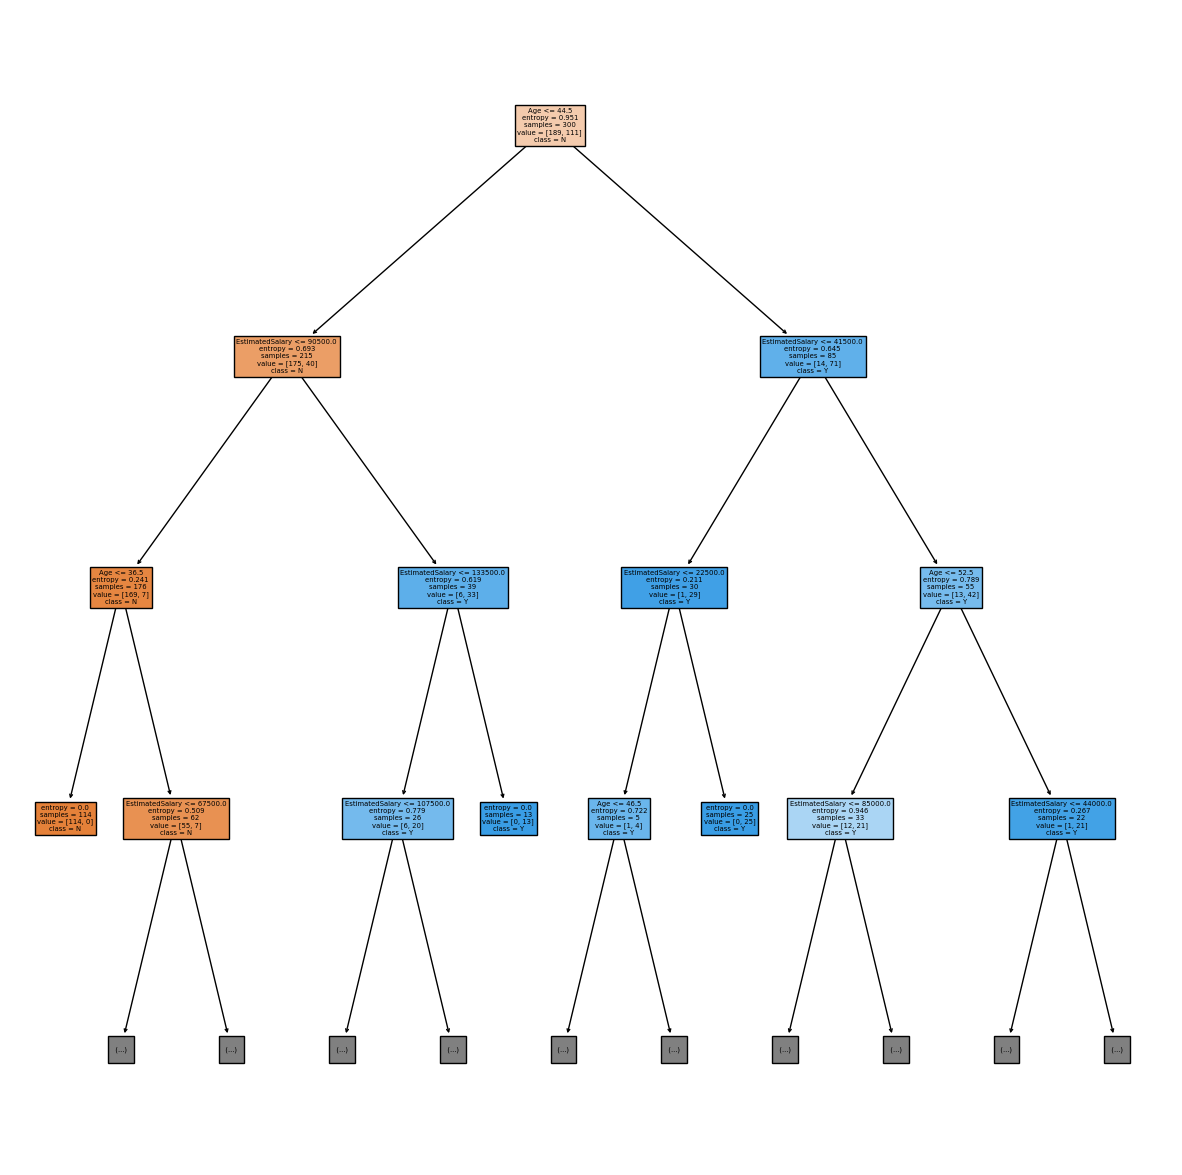

In [8]:
from sklearn import tree
names=dataset.columns
featurenames=names[2:4]
plt.figure(figsize=(15,15))
tree.plot_tree(classifier,max_depth=3,feature_names=featurenames,class_names=['N','Y'],filled=True)


### Method 2

In [14]:
# %pip install graphviz

     -------------------------------------- 47.0/47.0 kB 213.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn import tree
import graphviz
names=dataset.columns
featurenames=names[2:4]
dt_data=tree.export_graphviz(classifier,max_depth=3,feature_names=featurenames,class_names=['N','Y'],filled=True)
graph=graphviz.Source(dt_data)
graph.render("DT1")

'DT1.pdf'

: 